# Пользователи Мегалайна

Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.
Ниже выведем параметры каждого тарифа:


Тариф «Смарт»
Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 3 рубля
сообщение: 3 рубля
1 Гб интернет-трафика: 200 рублей


«Ультра»
Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 1 рубль
сообщение: 1 рубль
1 Гб интернет-трафика: 150 рублей

#  Открываем файл с данными и изучаем общую информацию

In [5]:
pip install pep8

In [6]:
import pandas as pd
import numpy as np
from math import ceil as math

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

from scipy import stats as st

In [7]:
call_data=pd.read_csv('/content/calls.csv')
inet_data=pd.read_csv('/content/internet.csv')
sms_data=pd.read_csv('/content/messages.csv')
tariff_data=pd.read_csv('/content/tariffs.csv')
user_data=pd.read_csv('/content/users.csv')
display(call_data.head())
display(inet_data.head())
display(sms_data.head())
display(tariff_data.head())
display(user_data.head())

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [8]:
inet_data.info()
inet_data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [9]:
call_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [10]:
sms_data.head(5)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [11]:
sms_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [12]:
tariff_data

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


В Таблице inet_data, имеется столбец - Unnamed, который дублирует индексацию таблицы. Необходимо будет его удалить.

Необходимо будет обновить информацию по дате в каждой таблице, поменять тип данных на int

#  Готовим данные

Рассматриваем таблицу с пользователями (user_data), посмотрим на процент пропусков по колонкам

In [13]:
report = user_data.isna().sum().to_frame()
report = report.rename(columns={0: 'missing_values'})
report['% of total'] = (report['missing_values'] / user_data.shape[0]).round(2)
report.sort_values(by='missing_values', ascending=False)

,missing_values,% of total
churn_date,462,0.92
user_id,0,0.00
age,0,0.00
city,0,0.00
first_name,0,0.00
last_name,0,0.00
reg_date,0,0.00
tariff,0,0.00


In [14]:
user_data['reg_date'] = pd.to_datetime(user_data['reg_date'], format='%Y-%m-%d')

Переведем столбец месяца подключения в удобный для нас формат.

In [15]:
user_data['tariff'].value_counts()

smart    351
ultra    149
Name: tariff, dtype: int64

In [16]:
user_data['churn_date'] = pd.to_datetime(user_data['churn_date'], format='%Y-%m-%d')

In [17]:
user_data['city'] = user_data['city'].str.lower()
user_data['first_name'] = user_data['first_name'].str.lower()
user_data['last_name'] = user_data['last_name'].str.lower()

Переведем столбец месяца отключения (те, данный, которые у нас есть) в удобный для нас формат. Также, переведем столбцы с названием городов и ФИО к нижнему регистру.

Рассмотрим таблицу со звонками. Перед тем как начать менять данные необходимо импорировать необходимые для исследования библитотеки (для строительства гистограмм, округления, графиков и т.д.)

Будет неоходимо перевести данные в колонке 'user_id' к типу данных "int".
В будущем нам будет необходимо рассмотреть данные по месяцам, поэтому мы будем использовать их названия, для того, чтобы заказчику было удобнее понимать все наши вычисления

In [18]:
call_data['call_date'] = pd.to_datetime(call_data['call_date'], format='%Y-%m-%d')
call_data['id'] = call_data['id'].astype(int)
call_data['month_name'] = pd.DatetimeIndex(call_data['call_date']).month_name()
call_data.sample(10)

,id,call_date,duration,user_id,month_name
128067,1329147,2018-10-31,0.00,1329,October
159440,1393692,2018-06-24,9.90,1393,June
70076,1175225,2018-12-21,1.30,1175,December
131182,133671,2018-12-31,0.00,1336,December
82426,1204309,2018-02-24,10.84,1204,February
202031,149725,2018-12-29,5.67,1497,December
18642,105131,2018-09-29,10.67,1051,September
19267,1052416,2018-11-12,0.00,1052,November
116196,1299288,2018-06-24,9.11,1299,June
103502,1265164,2018-09-01,5.93,1265,September


Построим график и посмотрим, какая длительность звонков является самой распространенной.
Также мы должны помнить, что «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута. Округляем длительность в большую сторону.

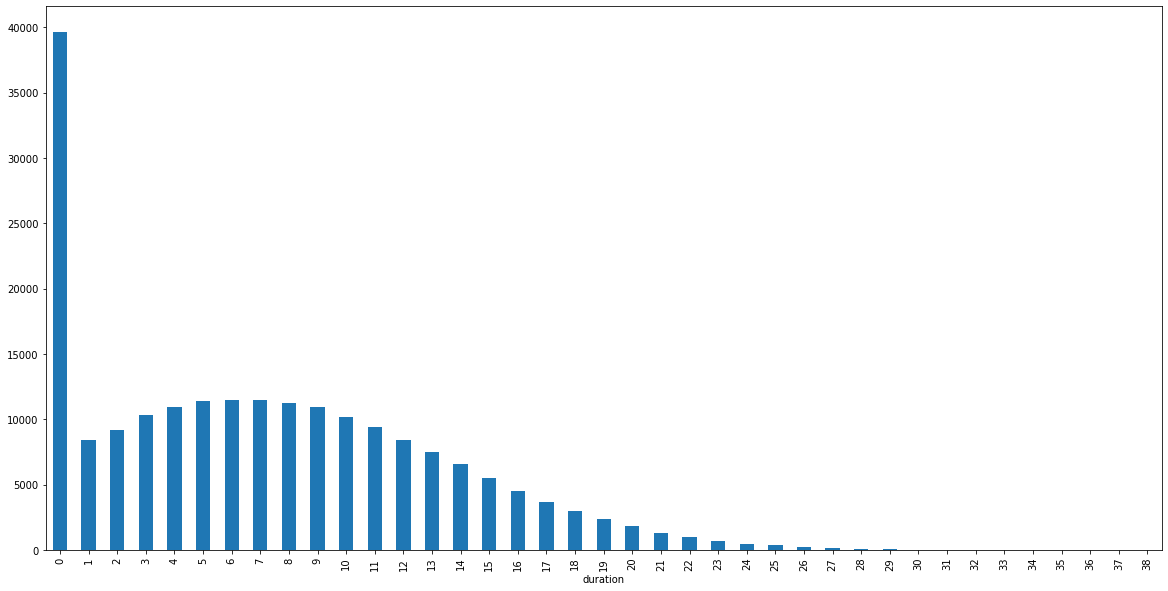

In [87]:
call_data['duration'] = call_data['duration'].apply(np.ceil)
call_data['duration'] = call_data['duration'].astype(int)
call_data.groupby('duration')['duration'].count().plot(
                                                      x='duration',y='count', 
                                                      kind='bar', 
                                                      figsize = (20,10)
                                                      )
plt.show()

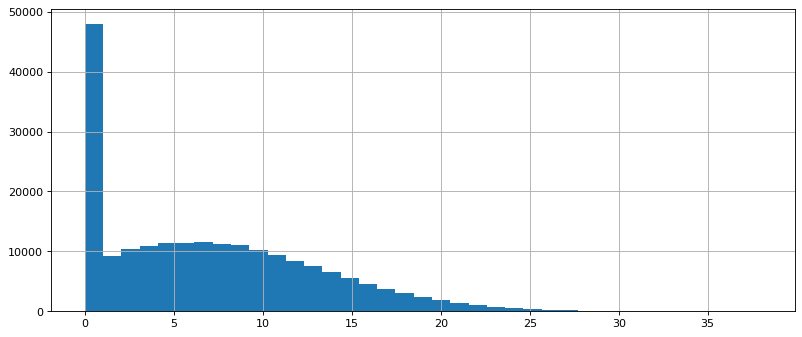

In [20]:
figure(figsize=(12, 5), dpi=80)
call_data['duration'].hist(bins=37);

Из графика мы видим, что огромное количество звонков - "нулевые". Однако нет смысла избавляться от данных значений. В тарифах учитывается показатель не общее количество звонков, а общее количество минут которое пользователь потратил за месяц. Клиент тарифа Смарт, совершивший 400 звонков с длительностью 0 минут будет платить столько же, сколько клиент, который совершил 1 звонок и говорил 400 минут.

Теперь рассмотрим таблицу, показывающую использование интернета. Выше мы увидели, что пропущенных данных нет. Основная задача - избавится от лишнего столбца, который дублирует индексы, и создать столбец с наименованием месяца.

In [21]:
inet_data.head(5)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [22]:
inet_data['session_date'] = pd.to_datetime(inet_data['session_date'], format='%Y-%m-%d')

In [23]:
inet_data = inet_data.drop(['Unnamed: 0'], axis=1)
inet_data['id'] = inet_data['id'].astype(int)
inet_data['month_name'] = pd.DatetimeIndex(inet_data['session_date']).month_name()
inet_data['mb_used'] = inet_data['mb_used'].apply(np.ceil)
inet_data['mb_used'] = inet_data['mb_used'].astype(int)

In [24]:
sms_data.head(5)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [25]:
sms_data['message_date'] = pd.to_datetime(sms_data['message_date'], format='%Y-%m-%d')

In [26]:
sms_data['id'] = sms_data['id'].astype(int)
sms_data['month_name'] = pd.DatetimeIndex(sms_data['message_date']).month_name()

Создадим сводную 3 сводных таблицы для показателей "звонки", "интернет", "смс", где будем группировать по номеру пользователя и месяцам

In [27]:
inet_count = inet_data.pivot_table(
    index=['month_name','user_id'], values=['mb_used'], aggfunc=['sum']
    )

In [28]:
inet_count

sum
                   mb_used
month_name user_id        
April      1005       9365
           1006      13954
           1007       8031
           1009      14730
           1011      18099
...                    ...
September  1494      16986
           1495      33105
           1496      26970
           1498      22166
           1499       1848

[3203 rows x 1 columns]

In [29]:
calls_count = call_data.pivot_table(
    index = ['month_name', 'user_id'], values='duration', aggfunc=['sum','count']
    )

In [30]:
sms_count = sms_data.pivot_table(
    index=['month_name','user_id'], values='message_date', aggfunc=('count')
    )

Теперь будет необходимо объединить данные таблицы, используем для этого функцию merge(), объединяем по столбцам "месяц" и "номер клиента"

In [31]:
sms_call_count = sms_count.merge(
    calls_count, on=['user_id', 'month_name'], how='outer'
    ) 

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:9203: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,2 on the right)
  validate=validate,


In [32]:
sms_call_count.reset_index(inplace=True)

Использовал reset_index для сбрасывание индексов

In [33]:
count_all = sms_call_count.merge(
    inet_count, on=['user_id','month_name'], how='outer'
    )
count_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            3214 non-null   int64  
 1   month_name         3214 non-null   object 
 2   message_date       2717 non-null   float64
 3   (sum, duration)    3174 non-null   float64
 4   (count, duration)  3174 non-null   float64
 5   (sum, mb_used)     3203 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 175.8+ KB


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:9203: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,2 on the right)
  validate=validate,


In [34]:
count_all.sample(5)

,user_id,month_name,message_date,"(sum, duration)","(count, duration)","(sum, mb_used)"
2146,1154,October,17.0,185.0,22.0,13993.0
785,1446,December,43.0,424.0,54.0,18009.0
1384,1481,June,20.0,272.0,40.0,13823.0
1229,1098,June,5.0,101.0,21.0,8261.0
1853,1269,November,17.0,272.0,30.0,19639.0


К вновь созданной таблице прикремляем таблицу "user_data", где у нас хранятся персональные данные клиентов

In [35]:
new_df=count_all.merge(user_data,on=['user_id'], how='outer')

In [36]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            3216 non-null   int64         
 1   month_name         3214 non-null   object        
 2   message_date       2717 non-null   float64       
 3   (sum, duration)    3174 non-null   float64       
 4   (count, duration)  3174 non-null   float64       
 5   (sum, mb_used)     3203 non-null   float64       
 6   age                3216 non-null   int64         
 7   churn_date         189 non-null    datetime64[ns]
 8   city               3216 non-null   object        
 9   first_name         3216 non-null   object        
 10  last_name          3216 non-null   object        
 11  reg_date           3216 non-null   datetime64[ns]
 12  tariff             3216 non-null   object        
dtypes: datetime64[ns](2), float64(4), int64(2), object(5)
memory us

Переименуем столбцы для новой таблицы, удалим ненужные столбцы (возраст и дату прекращения пользования тарифом)

In [37]:
new_df.head(5)
new_df.set_axis(
    ['user_id','month_name','sum_messages', 'minutes', 'sum_calls',
     'sum_mb_used', 'age', 'churn_date', 'city', 'first_name', 'last_name', 
     'reg_date', 'tariff'], axis='columns', inplace=True
     )
del new_df['age']
del new_df['churn_date']

In [38]:
new_df.sample(5)

,user_id,month_name,sum_messages,minutes,sum_calls,sum_mb_used,city,first_name,last_name,reg_date,tariff
1761,1197,December,20.0,493.0,72.0,28222.0,красноярск,демьян,черняев,2018-06-18,smart
352,1126,March,6.0,556.0,89.0,25331.0,санкт-петербург,яна,арсенкова,2018-01-19,ultra
1845,1233,November,35.0,605.0,81.0,20590.0,воронеж,сара,алфимова,2018-05-23,smart
503,1176,December,55.0,485.0,69.0,15385.0,волгоград,радим,куприянов,2018-01-20,smart
2148,1362,August,11.0,522.0,71.0,16527.0,владимир,нина,колесова,2018-08-02,smart


Создадим срезы по наименованию тарифов, выведем данные по их условиям, создадим для каждой отдельные функции, которые будут считать, сколько денег приносит каждый пользователь за отдельный месяц
Также рассчитаем, цену за один мегабайт 

In [39]:
new_df_smart = new_df.query('tariff == "smart"')
new_df_ultra = new_df.query('tariff == "ultra"')

In [40]:
tariff_data

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [41]:
sm_megabytes_per_month_incl = 15360
sm_monthly_fee = 550
sm_price_for_megabyte = 200/1024
sm_minutes = 500
sm_messages = 50
sm_rub_per_message = 3
sm_rub_per_minute = 3

In [42]:
def profit_for_tariff(row):
    mb_used = row['sum_mb_used']
    minutes = row['minutes']
    messages = row['sum_messages']
    total_megabytes = 0
    total_messages = 0 
    total_minutes = 0
    if mb_used > sm_megabytes_per_month_incl:
        total_megabytes = (mb_used - sm_megabytes_per_month_incl) * sm_price_for_megabyte
    if minutes > sm_minutes:
        total_minutes = (minutes - sm_minutes) * sm_rub_per_minute
    if messages > sm_messages:
        total_messages = (messages - sm_messages) * sm_rub_per_message
        
    return total_megabytes + total_minutes + total_messages + sm_monthly_fee

In [43]:
new_df_smart ['profit'] = new_df_smart.apply(profit_for_tariff, axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:
ult_megabytes_per_month_incl = 30720
ult_monthly_fee = 1950
ult_price_for_megabyte = 150/1024
ult_minutes = 3000
ult_messages = 1000
ult_rub_per_message = 1
ult_rub_per_minute = 1

In [45]:
def profit_for_tariff_2(row):
    mb_used = row['sum_mb_used']
    minutes = row['minutes']
    messages = row['sum_messages']
    total_megabytes = 0
    total_messages = 0 
    total_minutes = 0
    if mb_used > ult_megabytes_per_month_incl:
        total_megabytes = (mb_used - ult_megabytes_per_month_incl) * ult_price_for_megabyte
    if minutes > ult_minutes:
        total_minutes = (minutes - ult_minutes) * ult_rub_per_minute
    if messages > ult_messages:
        total_messages = (messages - sm_messages) * ult_rub_per_message
        
    return total_megabytes + total_minutes + total_messages + ult_monthly_fee

In [46]:
new_df_ultra ['profit'] = new_df_ultra.apply(profit_for_tariff_2, axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Для двух тарифов создадим новые таблицы, в которых просуммируем все известные нам данные по месяцам года. Также, т.к. функция month_name() показывала месяца не по порядку, а в алфавитной последовательности (April, August, и т.д.) использовал функцию для правильного порядка.

In [47]:
new_df_ultra_table = new_df_ultra.pivot_table(
    index='month_name', values=['minutes','sum_messages','sum_mb_used','profit'], 
    aggfunc=('sum')
    )

In [48]:
new_df_ultra_table.reset_index(inplace=True)
months = [
          "January", "February", "March", "April", "May", "June", "July", 
          "August", "September", "October", "November", "December"
          ]

new_df_ultra_table['month_name'] = pd.Categorical(
    new_df_ultra_table['month_name'], categories=months, ordered=True
    )

In [49]:
new_df_ultra_table = new_df_ultra_table.sort_values(by="month_name")
new_df_ultra_table

,month_name,minutes,profit,sum_mb_used,sum_messages
4,January,3853.0,17550.000000,118382.0,304.0
3,February,7131.0,47353.125000,282887.0,527.0
7,March,18117.0,74154.345703,649423.0,1195.0
0,April,25191.0,109748.730469,926409.0,1736.0
8,May,34192.0,137682.714844,1298540.0,2536.0
6,June,40295.0,170693.115234,1591148.0,3505.0
5,July,49667.0,191873.730469,1866833.0,4536.0
1,August,54653.0,221613.281250,2096565.0,5183.0
11,September,62036.0,231578.466797,2210554.0,6013.0
10,October,68644.0,253000.927734,2467856.0,7187.0


In [50]:
new_df_smart_table = new_df_smart.pivot_table(
    index='month_name', values=['minutes','sum_messages','sum_mb_used','profit'],
     aggfunc='sum'
     )

In [51]:
new_df_smart_table.reset_index(inplace=True)
months = [
          "January", "February", "March", "April", "May", "June", "July", 
          "August", "September", "October", "November", "December"
          ]

new_df_smart_table['month_name'] = pd.Categorical(
    new_df_smart_table['month_name'], categories=months, ordered=True
    )

In [52]:
new_df_smart_table = new_df_smart_table.sort_values(by="month_name")
new_df_smart_table

,month_name,minutes,profit,sum_mb_used,sum_messages
4,January,6931.0,23886.914062,289831.0,620.0
3,February,17324.0,46651.585938,673461.0,1397.0
7,March,30034.0,86115.453125,1164537.0,2453.0
0,April,41119.0,103302.132812,1509702.0,3443.0
8,May,54618.0,161715.992188,2231353.0,4762.0
6,June,64885.0,188531.070312,2593622.0,5478.0
5,July,82079.0,234780.796875,3168466.0,6784.0
1,August,99045.0,295747.031250,3908561.0,7905.0
11,September,111439.0,311758.851562,4244377.0,8746.0
10,October,125284.0,383623.640625,4932898.0,9927.0


Для сравнения ниже создадим четыре гистограммы, которые покажут нам разницу двух тарифов по параметрам "интернет","смс","минуты разговора","прибыль".

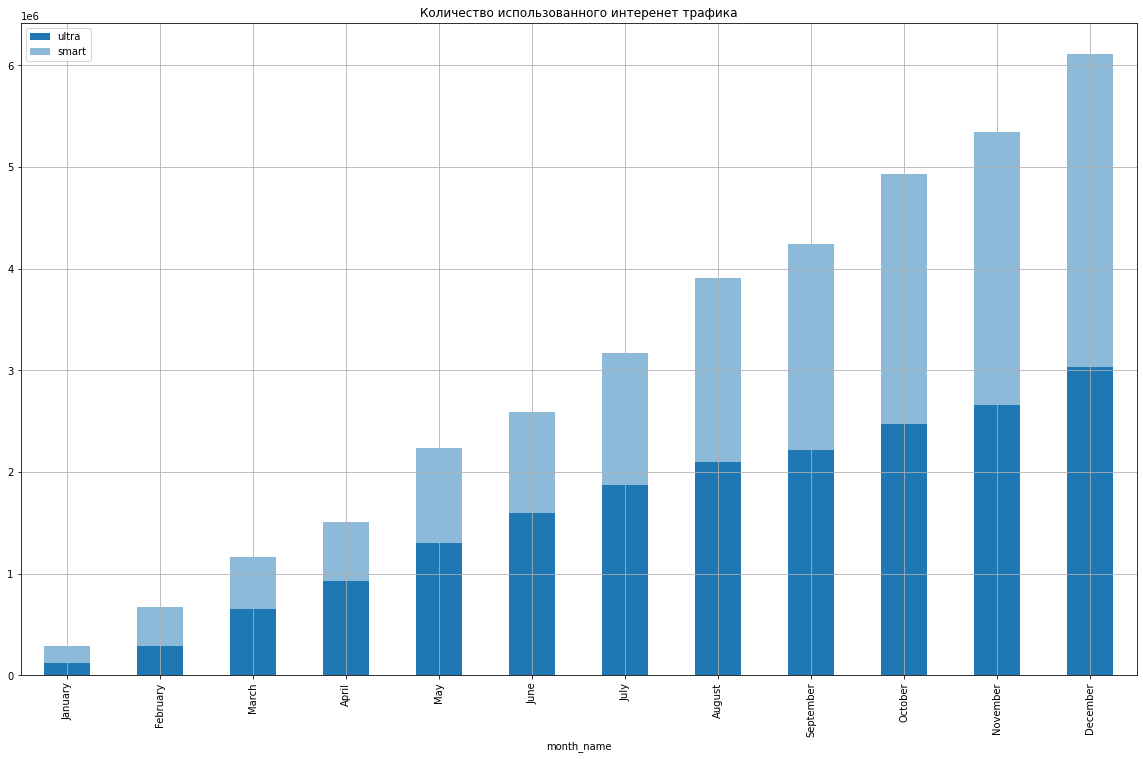

In [53]:
ax=new_df_ultra_table.plot(
    y='sum_mb_used', x='month_name', grid=True, figsize=(20,12), kind='bar', 
    label='ultra', legend=True, title='Количество использованного интеренет трафика'
    )

new_df_smart_table.plot(
    y='sum_mb_used', x='month_name', grid=True, figsize=(20,12), kind='bar', 
    label='smart', alpha=0.5, ax=ax, legend=True
    )

plt.show()

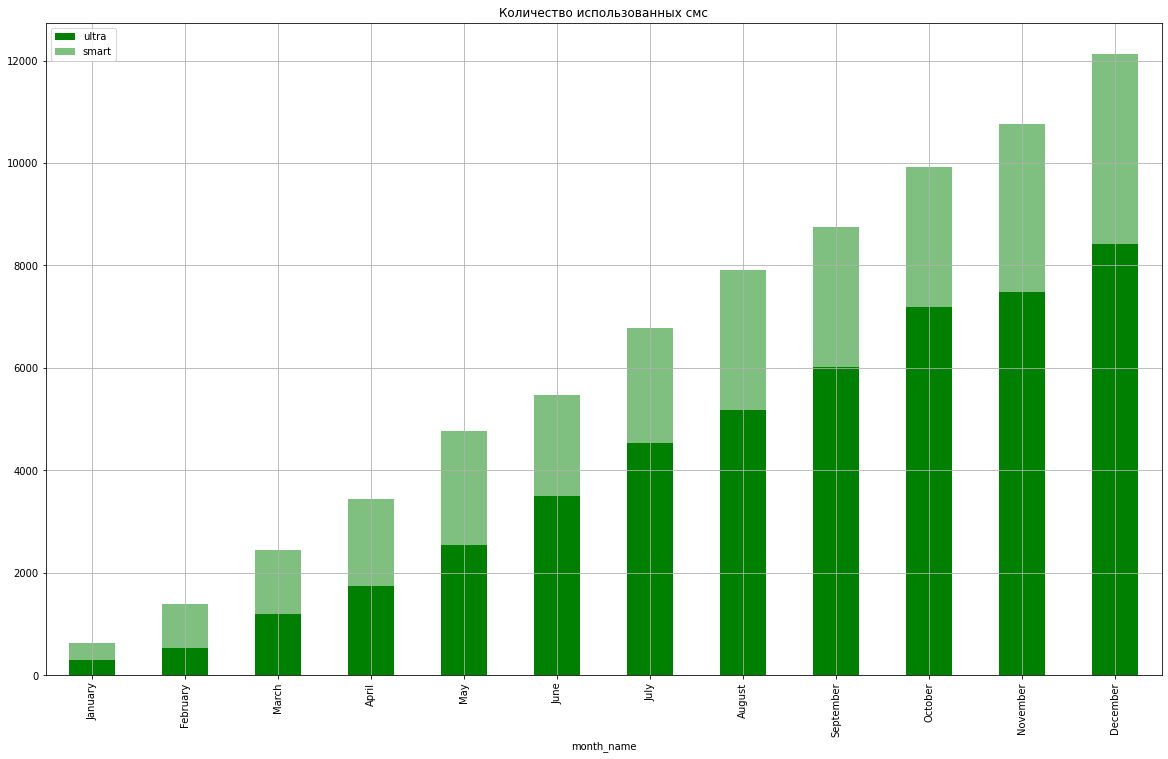

In [54]:
ax=new_df_ultra_table.plot(
    y='sum_messages', x='month_name', grid=True, figsize=(20,12), kind='bar', 
    label='ultra', color='g', title='Количество использованных смс', legend=True
    )

new_df_smart_table.plot(
    y='sum_messages', x='month_name', grid=True, figsize=(20,12), kind='bar', 
    label='smart', color='g', alpha=0.5, ax=ax, legend=True
    )

plt.show()

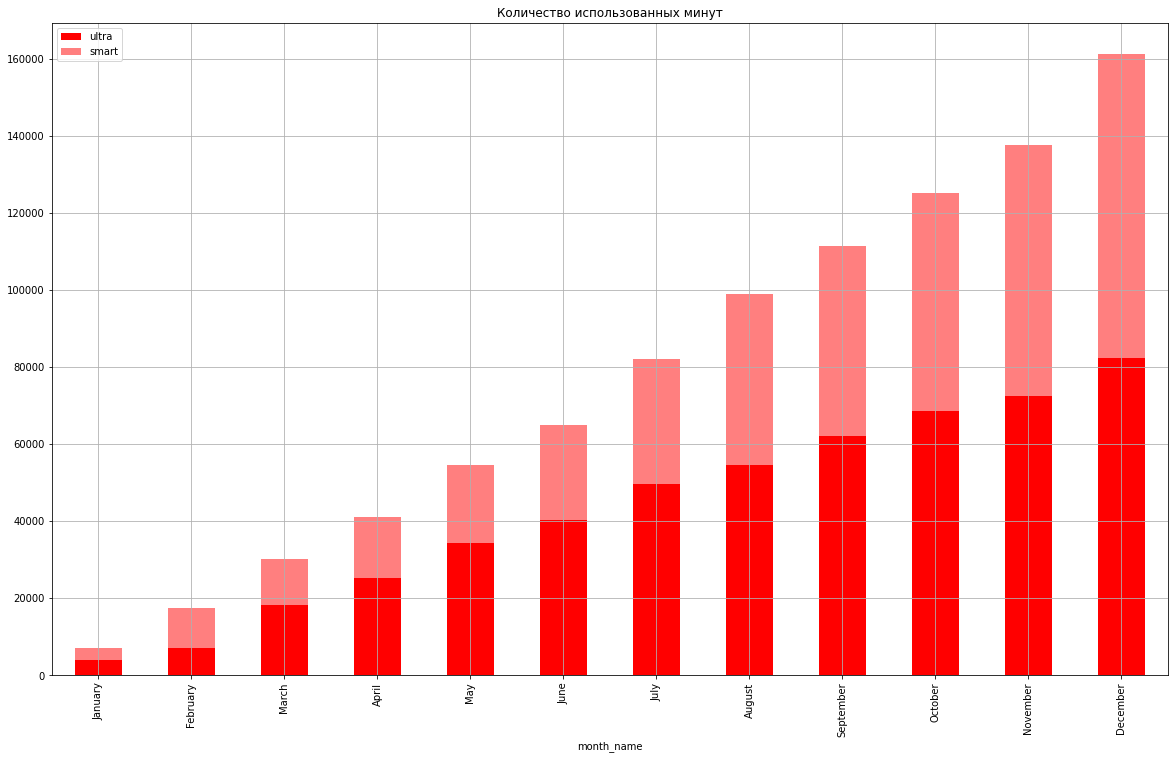

In [55]:
ax=new_df_ultra_table.plot(
    y='minutes', x='month_name', grid=True, figsize=(20,12), kind='bar', 
    label='ultra', color='r', legend=True
    )

new_df_smart_table.plot(
    y='minutes', x='month_name', grid=True, figsize=(20,12), kind='bar', 
    label='smart',  color='r', alpha=0.5, ax=ax, title='Количество использованных минут', legend=True
    )

plt.show()

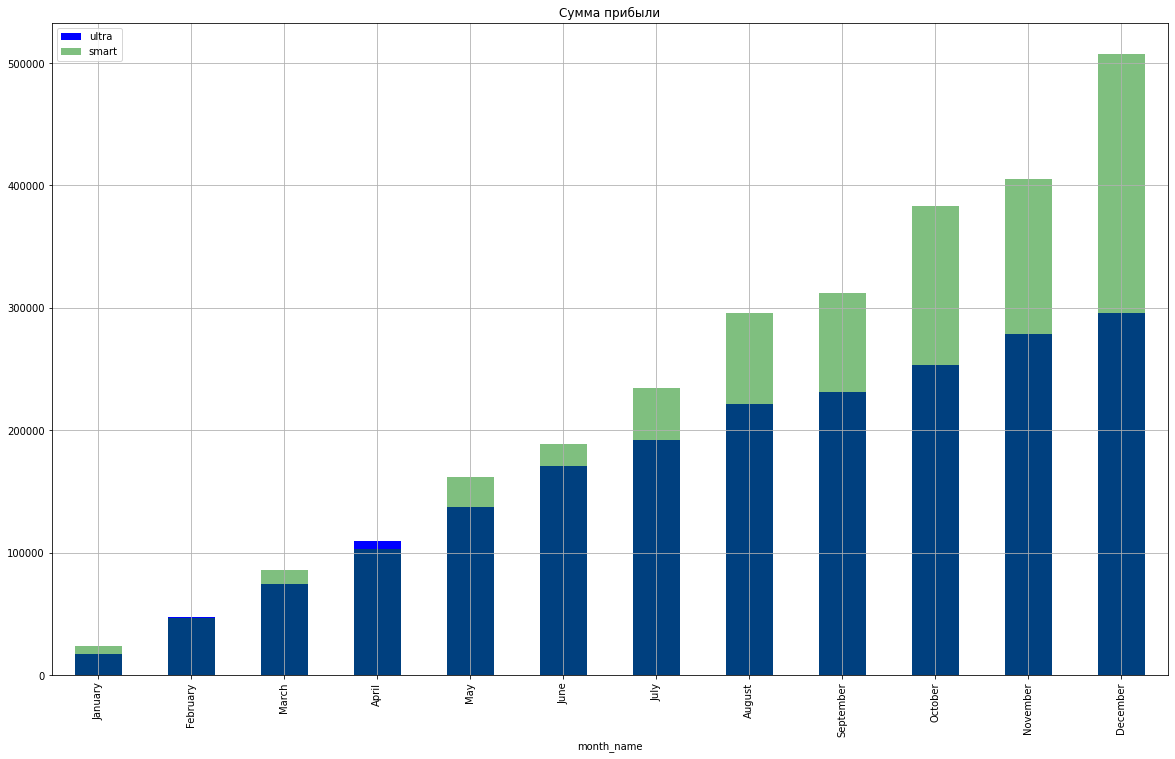

In [56]:
ax=new_df_ultra_table.plot(
    y='profit', x='month_name', grid=True, figsize=(20,12), kind='bar', 
    label='ultra',color='b', legend=True, title='Сумма прибыли'
    )

new_df_smart_table.plot(
    y='profit', x='month_name', grid=True, figsize=(20,12), kind='bar', 
    label='smart', color='g', alpha=0.5, ax=ax, legend=True
    )

plt.show()

С данными графиками я просидел большую часть проекта. Когда я увидел, что идет простое увеличение от месяца к месяцу, я был уверен, что сделал что то неправильно. Когда месяца были в алфавитном порядке, это было не так сильно заметно, после изменения стало очень заметно. Перепроверял в самом начале, еще перед объединением через query() по каждому месяцу информацию, сколько значений и т.д., так и не смог найти потверждения, что я ошибся.

#  Проанализируем данные

Для каждого тарифа найдем среднее значение, дисперсию, стандартное отклонение для каждого параметра (время звонка, смс, интернет трафик). Для этого используем цикл.

In [57]:
print('Тариф Smart')
print()
for column in new_df_smart[['minutes','sum_messages','sum_mb_used']]:
    print('Среднее значение {}: {:.0f}'.format(column,new_df_smart[column].mean()))
    print('Дисперсия {}: {:.0f}'.format(column,np.var(new_df_smart[column], ddof=1)))
    print('Стандартное отклонение {}: {:.0f} \n'.format(column, np.std(new_df_smart[column])))

Тариф Smart

Среднее значение minutes: 419
Дисперсия minutes: 35844
Стандартное отклонение minutes: 189 

Среднее значение sum_messages: 39
Дисперсия sum_messages: 718
Стандартное отклонение sum_messages: 27 

Среднее значение sum_mb_used: 16236
Дисперсия sum_mb_used: 34443101
Стандартное отклонение sum_mb_used: 5868 



In [58]:
new_df.pivot_table(index='tariff',  
                 values=['minutes','sum_messages','sum_mb_used'], 
                 aggfunc=['mean', 'std', 'var']).T.style.format('{:.2f}')

In [59]:
print('Тариф Ultra')
print()
for column in new_df_ultra[['minutes','sum_messages','sum_mb_used']]:
    print('Среднее значение {}: {:.0f}'.format(column,new_df_ultra[column].mean()))
    print('Дисперсия {}: {:.0f}'.format(column,np.var(new_df_ultra[column], ddof=1)))
    print('Стандартное отклонение {}: {:.0f} \n'.format(column, np.std(new_df_ultra[column])))

Тариф Ultra

Среднее значение minutes: 545
Дисперсия minutes: 94203
Стандартное отклонение minutes: 307 

Среднее значение sum_messages: 61
Дисперсия sum_messages: 2110
Стандартное отклонение sum_messages: 46 

Среднее значение sum_mb_used: 19687
Дисперсия sum_mb_used: 99043440
Стандартное отклонение sum_mb_used: 9947 



In [60]:
print (new_df_smart[['profit']].describe())
print()
print()
print (new_df_ultra[['profit']].describe())

            profit
count  2230.000000
mean   1233.043032
std     787.644371
min     550.000000
25%     550.000000
50%     959.546875
75%    1667.587891
max    6711.015625


            profit
count   986.000000
mean   2060.417872
std     356.141530
min    1950.000000
25%    1950.000000
50%    1950.000000
75%    1950.000000
max    4743.310547


Для каждого тарифа создадим таблицу, в которых будет отображено средние значения каждого из параметров (опять используем функцию для правильного порядка месяцев)

In [61]:
new_df_smart_mean = new_df_smart.pivot_table(
    index='month_name', values=['minutes','sum_messages','sum_mb_used','profit'], aggfunc=['mean']
    )
new_df_smart_mean.reset_index(inplace=True)

In [62]:
months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]

new_df_smart_mean['month_name'] = pd.Categorical(
    new_df_smart_mean['month_name'], categories=months, ordered=True
    )

new_df_smart_mean = new_df_smart_mean.sort_values(by="month_name")
new_df_smart_mean = new_df_smart_mean.drop(0)

In [63]:
new_df_ultra_mean = new_df_ultra.pivot_table(
    index='month_name', values=['minutes','sum_messages','sum_mb_used','profit'], aggfunc='mean'
    )
new_df_ultra_mean.reset_index(inplace=True)

In [64]:
months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]

new_df_ultra_mean['month_name'] = pd.Categorical(
    new_df_ultra_mean['month_name'], categories=months, ordered=True
    )

new_df_ultra_mean = new_df_ultra_mean.sort_values(by="month_name")

In [65]:
new_df_ultra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 986 entries, 60 to 3214
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   user_id       986 non-null    int64         
 1   month_name    985 non-null    object        
 2   sum_messages  795 non-null    float64       
 3   minutes       951 non-null    float64       
 4   sum_calls     951 non-null    float64       
 5   sum_mb_used   975 non-null    float64       
 6   city          986 non-null    object        
 7   first_name    986 non-null    object        
 8   last_name     986 non-null    object        
 9   reg_date      986 non-null    datetime64[ns]
 10  tariff        986 non-null    object        
 11  profit        986 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(5)
memory usage: 100.1+ KB


Построим диаграммы размаха для двух тарифов, используя данные по смс, звонкам и инетрнету

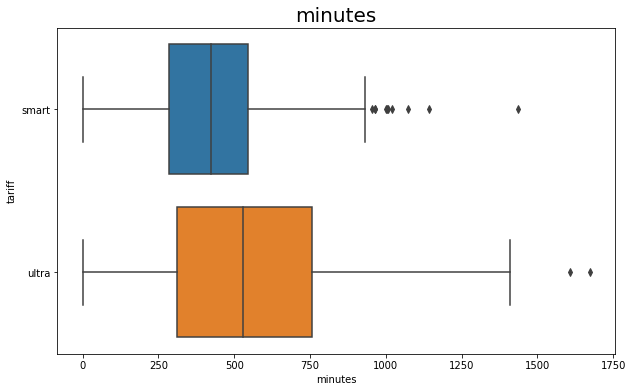

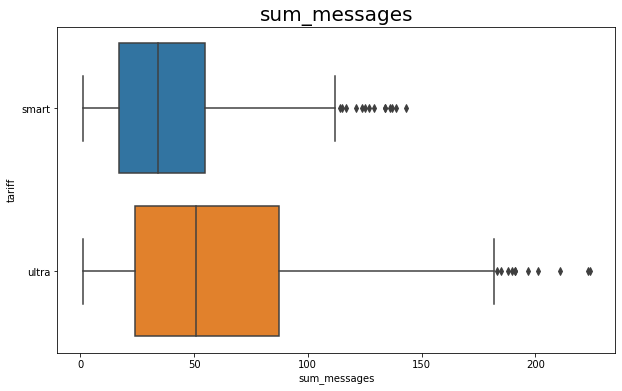

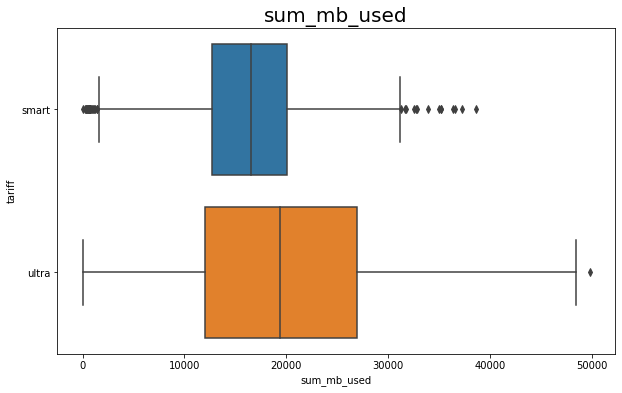

In [66]:
for columns in new_df[['minutes','sum_messages','sum_mb_used']]:
    plt.figure(figsize=(10,6))
    plt.title(columns, fontsize=20)
    sns.boxplot(data=new_df, x=columns, y='tariff')

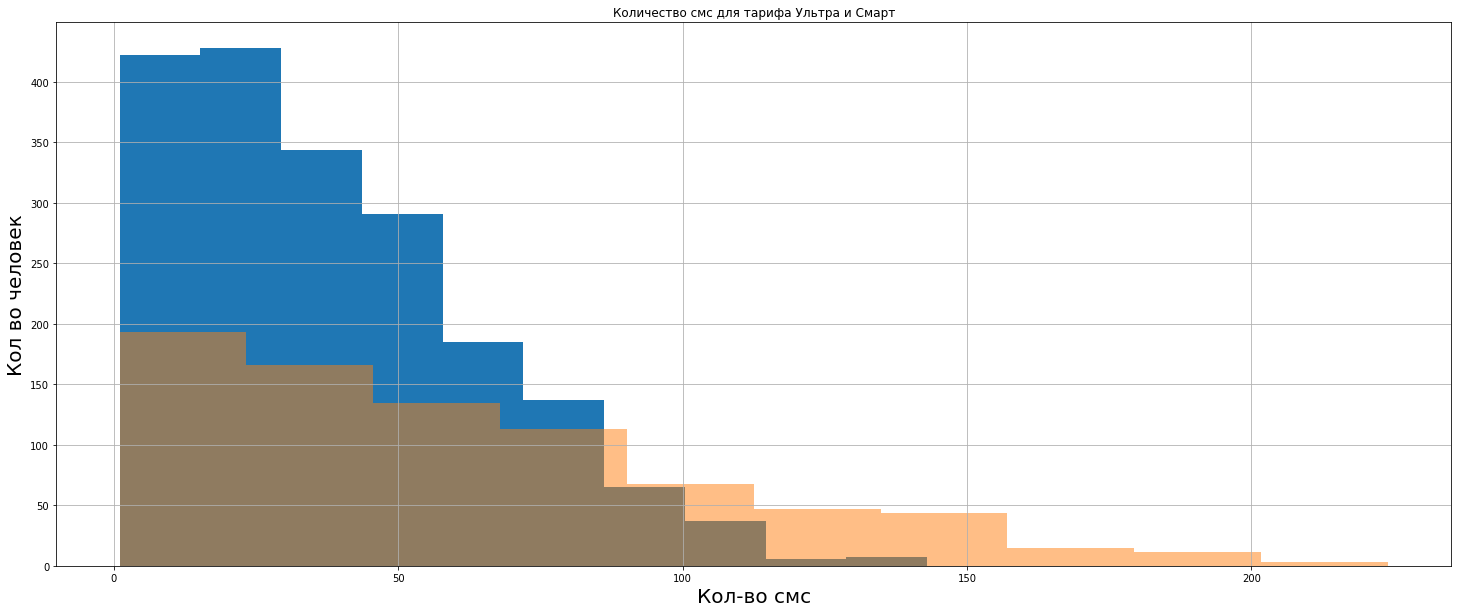

In [67]:
new_df_smart['sum_messages'].plot(
    kind='hist', alpha=1, figsize=(25,10), title='Количество смс для тарифа Ультра и Смарт', grid=True
    )

new_df_ultra['sum_messages'].plot(
    kind='hist', figsize=(25,10), alpha=0.5, grid=True
    )

plt.xlabel('Кол-во смс', fontsize=20)
plt.ylabel('Кол во человек', fontsize=20)
plt.show()

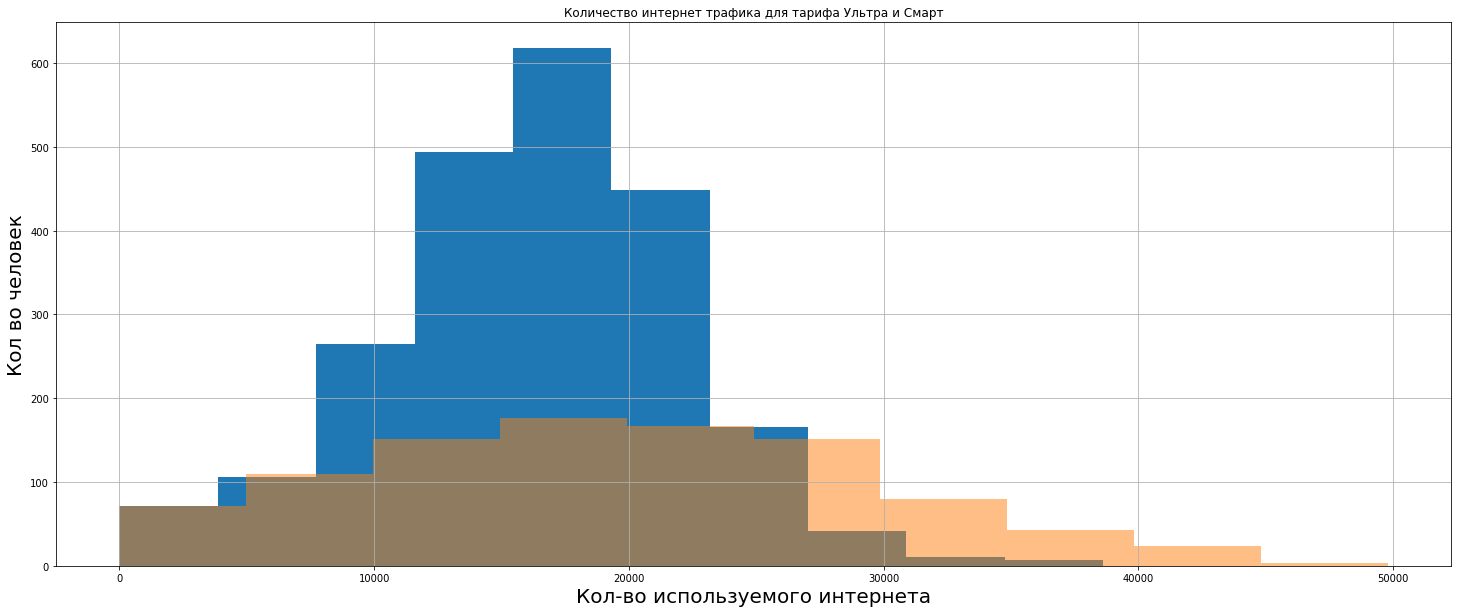

In [68]:
new_df_smart['sum_mb_used'].plot(
    kind='hist', alpha=1, figsize=(25,10), title='Количество интернет трафика для тарифа Ультра и Смарт', grid=True
    )

new_df_ultra['sum_mb_used'].plot(
    kind='hist',figsize=(25,10), alpha=0.5, grid=True
    )

plt.xlabel('Кол-во используемого интернета', fontsize=20)
plt.ylabel('Кол во человек', fontsize=20)
plt.show()

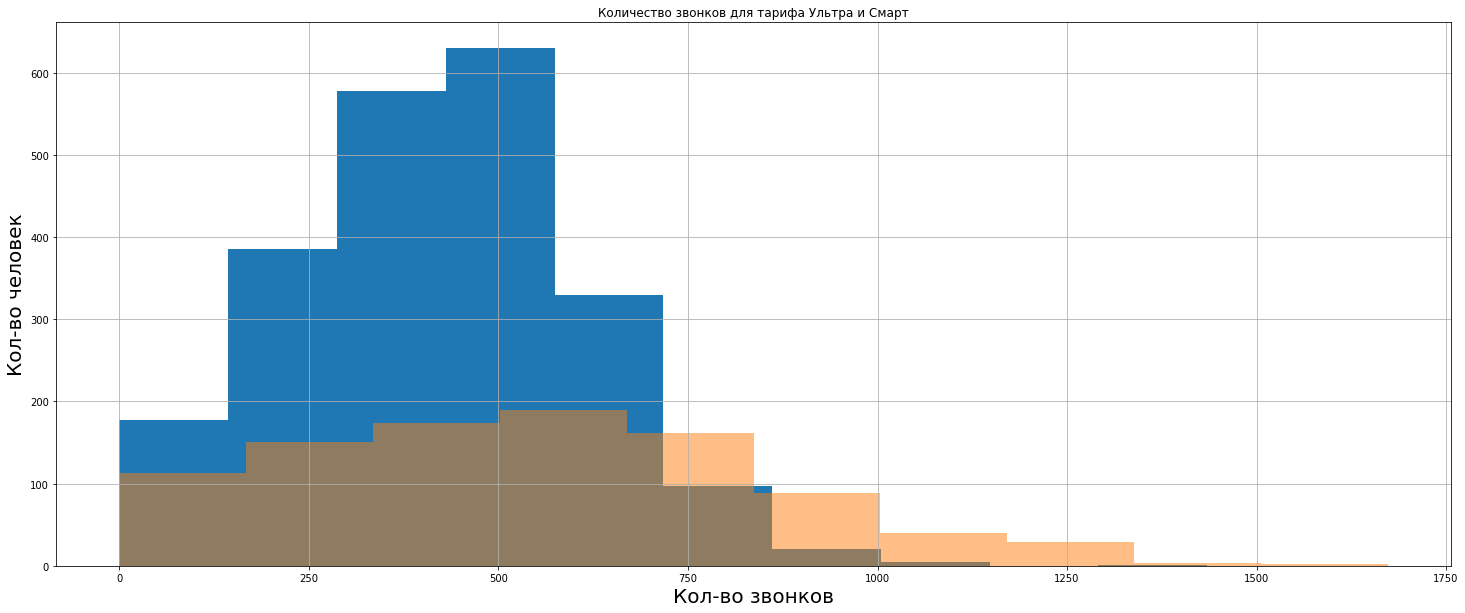

In [69]:
new_df_smart['minutes'].plot(
    kind='hist', alpha=1, figsize=(25,10), title='Количество звонков для тарифа Ультра и Смарт', grid=True
    )

new_df_ultra['minutes'].plot(
    kind='hist',figsize=(25,10), alpha=0.5, grid=True
    )

plt.xlabel('Кол-во звонков', fontsize=20)
plt.ylabel('Кол-во человек', fontsize=20)
plt.show()

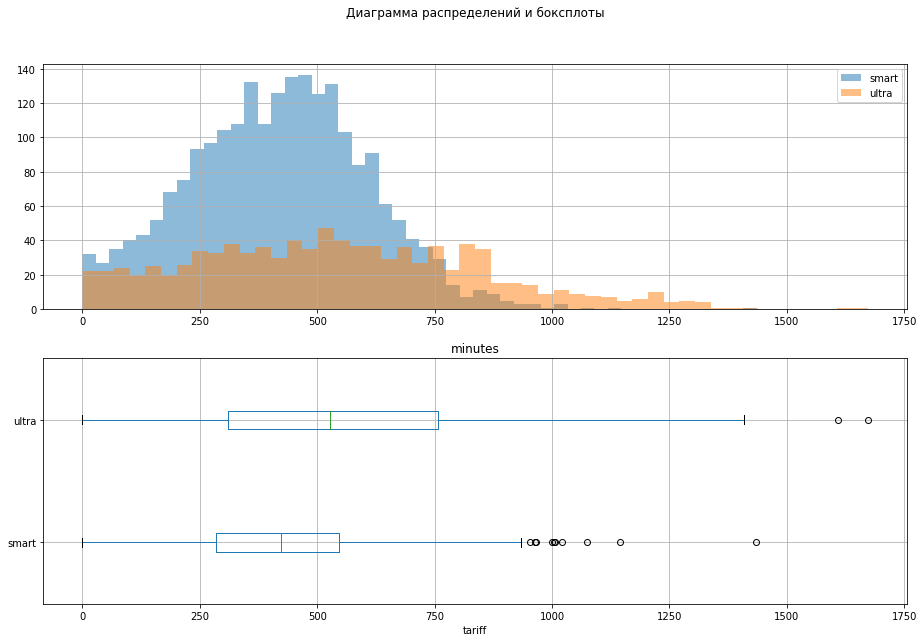

In [70]:
def plot_hist_boxplot(df, group_col, column, title='Диаграмма распределений и боксплоты', bins=[50, 50]):
    
    np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
    
    fig, axes = plt.subplots(2, 1, figsize=(15, 10))
    
    for item in df[group_col].unique():
        axes[0].hist(df.loc[df[group_col] == item, column], bins=bins[0], label=item, alpha=0.5)
    axes[0].legend()
    axes[0].grid()
    
    df.boxplot(column, by=group_col, ax=axes[1], vert=False)
    fig.suptitle(title)
    
    plt.show()
    
plot_hist_boxplot(new_df, 'tariff', 'minutes')

Вывод

Исходя из полученных графиков видно, что:

а) пользователи тарифа Smart в среднем говорят по 420 мин, когда пользователи тарифа Ultra -  около 510 мин;

б) пользователи тарифа Smart используют примерно 16000 мб, в то время как пользователи тарифа Ultra -  около 19000 мб;

в) пользователи тарифа Smart отправляют 35 сообщений, когда пользователи тарифа Ultra отправляют около 50 сообщений;

Ниже выведем повторно условия каждого из тарифов

In [71]:
tariff_data

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [72]:
print('В среднем выручка с пользователя тарифа Смарт в месяц составляет {:.0f} рублей'.format (new_df_smart['profit'].mean()))
print('В среднем выручка с пользователя тарифа Ультра в месяц составляет {:.0f} рублей'.format (new_df_ultra['profit'].mean()))

В среднем выручка с пользователя тарифа Смарт в месяц составляет 1233 рублей
В среднем выручка с пользователя тарифа Ультра в месяц составляет 2060 рублей


In [73]:
print('Прибыль по тарифу Ультра за год: {:.0f} рублей'.format(new_df_ultra['profit'].sum()))
print('Прибыль по тарифу Смарт за год: {:.0f} рублей'.format(new_df_smart['profit'].sum()))

Прибыль по тарифу Ультра за год: 2031572 рублей
Прибыль по тарифу Смарт за год: 2749686 рублей


Изучив данные, мы выявили, что клиенты тарифа практически не превышают лимит своего пакета в отличие от клиентов тарифа Смарт. Основная выручка для тарифа "Ультра" идет благодаря абонетской плате, ее пользователи редко превышают лимит.

Пользователи тарифа "Смарт" наоборот, очень часто платят за превышение условий, однако абонентская плата в этом тарифе не является основной "статьей" дохода для компании

В то же время, мы видим, что, несмотря на индивидуальные показатели клиентов разных тарифов(выручка с одного конкретного пользователя тарифа "Ультра" больше чем с одного конкретного пользователя тарифа "Смарт") выручка с клиентов тарифа "Смарт" за год выше, чем выручка с клиентов тарифа "Ультра" на 700 000 руб.

#  Проверяем гипотезы


Задача: Средняя выручка пользователей тарифов «Ультра» и «Смарт» могут различаться:

Для того, чтобы подтвердить либо опровергнуть данное заявление, необходимо сформулировать 2 гипотезы:

-Нулевая гипотеза "H_0": Средняя выручка пользователей тарифов Смарт и Ультра не различается

-Альтернативная гипотеза "H_1": Средняя выручка пользователей тарифов Смарт и Ультра различается

параметр alpha =  5%

In [74]:
print (new_df_ultra['profit'].var())
print (new_df_smart['profit'].var())

126836.78921496592
620383.6548572079


Для начала проверим можем ли мы считать дисперсии выборок равными. 

Они существенно различаются, значит - equal_var=False

In [75]:
ultra_profit = new_df_ultra['profit']
smart_profit = new_df_smart['profit']

In [76]:
alpha = 0.05

results = st.ttest_ind(ultra_profit, smart_profit, equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue > alpha):
    print("Не получилось отвергнуть нулевую гипотезу")
else:
    print("Отвергаем нулевую гипотезу")

p-значение: 3.665639404941842e-296
Отвергаем нулевую гипотезу


Исходя из исследования можно увидеть, нулевая гипотеза не подтвердилась

Задача: Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.
регионов
Для того, чтобы подтвердить либо опровергнуть данное заявление необходимо сформулировать две пары гипотез :

а)

-Нулевая гипотеза H_0: Выручка пользователей тарифа "Ультра" из Москвы не отличается от выручки пользователей тарифа "Ультра" из других регионов

-Альтернативная гипотеза H_1: Средняя выручка пользователей тарифа "Ультра" из Москвы отличается от выручки пользователей тарифа "Ультра" из других регионов

б) 

-Нулевая гипотеза H_0: Выручка пользователей тарифа "Смарт" из Москвы не отличается от выручки пользователей тарифа "Смарт" из других регионов

-Альтернативная гипотеза H_1: Средняя выручка пользователей тарифа "Смарт" из Москвы отличается от выручки пользователей тарифа "Смарт" из других регионов

параметр alpha =  5%


В первую очередь создадим срезы в таблицах по названию городов

In [77]:
def profit_for_tariff_3(row):
    mb_used = row['sum_mb_used']
    minutes = row['minutes']
    messages = row['sum_messages']
    tariff = row['tariff']
    total_megabytes = 0
    total_messages = 0 
    total_minutes = 0
    if tariff == 'smart':
        if mb_used > sm_megabytes_per_month_incl:
            total_megabytes = (mb_used - sm_megabytes_per_month_incl) * sm_price_for_megabyte
        if minutes > sm_minutes:
            total_minutes = (minutes - sm_minutes) * sm_rub_per_minute
        if messages > sm_messages:
            total_messages = (messages - sm_messages) * sm_rub_per_message
        
        return total_megabytes + total_minutes + total_messages + sm_monthly_fee

    if tariff == 'ultra':
        if mb_used > ult_megabytes_per_month_incl:
            total_megabytes = (mb_used - ult_megabytes_per_month_incl) * ult_price_for_megabyte
        if minutes > ult_minutes:
            total_minutes = (minutes - ult_minutes) * ult_rub_per_minute
        if messages > ult_messages:
            total_messages = (messages - sm_messages) * ult_rub_per_message
        
        return total_megabytes + total_minutes + total_messages + ult_monthly_fee



In [78]:
new_df['profit'] = new_df.apply(profit_for_tariff_3, axis=1)

In [79]:
new_df.sample(5)

,user_id,month_name,sum_messages,minutes,sum_calls,sum_mb_used,city,first_name,last_name,reg_date,tariff,profit
866,1340,October,11.0,352.0,58.0,18986.0,пенза,тимофей,алютин,2018-01-30,smart,1258.203125
1654,1138,October,9.0,562.0,84.0,26747.0,екатеринбург,леся,ерофеева,2018-07-13,smart,2960.023438
979,1378,May,14.0,529.0,77.0,14283.0,иркутск,евгения,бычкова,2018-01-19,smart,637.000000
2252,1411,October,103.0,601.0,83.0,27881.0,грозный,берта,прокофьева,2018-07-13,smart,3457.507812
1667,1147,November,36.0,266.0,47.0,19922.0,якутск,владимир,синицын,2018-07-09,smart,1441.015625


In [80]:
moscow_df = new_df.query('city == "москва"').profit
non_moscow_df = new_df.query('city != "москва"').profit

In [81]:
alpha = 0.05

result = st.ttest_ind(moscow_df, non_moscow_df, equal_var=False)

print('p-значение:', result.pvalue)


if (result.pvalue > alpha):
    print("Не получилось отвергнуть нулевую гипотезу")
else:
    print("Отвергаем нулевую гипотезу")

p-значение: 0.4517561756356935
Не получилось отвергнуть нулевую гипотезу


In [82]:
moscow_smart = new_df_smart.query('city == "москва"').profit
non_moscow_smart = new_df_smart.query('city != "москва"').profit
moscow_ultra = new_df_ultra.query('city == "москва"').profit
non_moscow_ultra = new_df_ultra.query('city != "москва"').profit

In [83]:
alpha = 0.05

result = st.ttest_ind(moscow_smart, non_moscow_smart, equal_var=False)

print('p-значение:', result.pvalue)


if (result.pvalue > alpha):
    print("Не получилось отвергнуть нулевую гипотезу")
else:
    print("Отвергаем нулевую гипотезу")

p-значение: 0.14107512182711163
Не получилось отвергнуть нулевую гипотезу


In [84]:
alpha = 0.05

result = st.ttest_ind(moscow_ultra, non_moscow_ultra, equal_var=False)

print('p-значение:', result.pvalue)

if (result.pvalue > alpha):
    print("Не получилось отвергнуть нулевую гипотезу")
else:
    print("Отвергаем нулевую гипотезу")

p-значение: 0.8714231399483139
Не получилось отвергнуть нулевую гипотезу


Добавил разделение только на Москву и регионы.  
    При создании таблицы и формулы для выручки изначально специально разделял их на две группы, и прописывал отдельно для каждого тарифа функцию,думал будет проще по каждой из них работать, и каждый раз не использовать query() из-за этого в конце не смог их соединить. Я насколько понимаю, таблицы new_df_smart и new_df_smart можно объединить, но с помощью join() и merge() у меня получилось совсем не то, что нужно. Поэтому я еще раз переписал функцию уже для двух тарифов для поиска выручки.  
    Уже после того, как составил функцию, посоветовали concat(), вроде как получилось, насколько понимаю, он как раз может объединять таблицы
    Результат тот же самый - Отвергнуть нулевую гипотезу не получилось

In [85]:
st.ttest_ind(
    [*moscow_smart, *moscow_ultra], [*non_moscow_smart, *non_moscow_ultra], equal_var=False
    )

Ttest_indResult(statistic=0.7527950558529936, pvalue=0.4517561756356935)

In [86]:
last_df = pd.concat([new_df_smart, new_df_ultra])
last_df.sample(5)

,user_id,month_name,sum_messages,minutes,sum_calls,sum_mb_used,city,first_name,last_name,reg_date,tariff,profit
2865,1204,July,NaN,406.0,51.0,27265.0,москва,мирослава,лазарева,2018-01-04,smart,2875.195312
1117,1421,July,63.0,359.0,52.0,21263.0,калининград,гайдар,александрович,2018-02-22,smart,1741.929688
3129,1388,December,NaN,516.0,77.0,21844.0,вологда,рустам,левин,2018-08-27,smart,1864.406250
1516,1061,August,12.0,639.0,89.0,21983.0,санкт-петербург,тамара,ситникова,2018-07-15,smart,2260.554688
661,1262,March,22.0,174.0,25.0,11202.0,ульяновск,антонина,ларина,2018-03-17,smart,550.000000


Несмотря на различия между пользователями самих тарифов, исследование не нашло различий между выручкой для Москвы и выручкой со стороны других регионов. Нулевую гипотезу не отвергаем.

#  Вывод

Мы изучили предоставленные нам таблицы, рассмотрели возможность замены пропущенных значений, изменения типа данных. Для дальнейшего анализа изменили столбцы с датами, в целом подготовили таблицы для дальнейшего объединения и анализа.

В последующем объединили таблицы, создали две отдельных сводных таблицы для каждого из тарифов, посчитали прибыль от каждого клиента за определенный месяц, нашли дисперсию, среднее и стандартное отклонение. После этого, также посчитали выручку от каждого тарифа. В рамках данной стадии изучения проекта нашли две важные детали:

1) разные статьи задолженности: Изучив данные, мы выявили, что клиенты тарифа "Ультра"практически не превышают лимит своего пакет, а значит в основном платят только абонентскую плату. Пользователи тарифа "Смарт" наоборот, очень часто платят за превышение условий, однако абонентская плата в этом тарифе не является основной "статьей" дохода для компании.

2) Выручка с одного конкретного пользователя тарифа "Ультра" больше чем с одного конкретного пользователя тарифа "Смарт", однако в целом выручка с клиентов тарифа "Смарт" за год выше, чем выручка с клиентов тарифа "Ультра" на 700 000 руб (возможно дело в бОльшем количестве клиентов тарифа "Смарт").

После этого мы проверили заданные нам гипотезы. В результате выяснили, что: 

а) выручка тарифов Смарт и Ультра отличается друг от друга;

б) выручка клиентов с Москвы и других регионов не отличается.


Подводя итоги, мы можем сказать, что при равном количестве клиентов на обоих тарифах, "Ультра" являлся бы самым прибыльным тарифом. Однако, мы видим, что большая часть клиентов все таки предпочитают "Смарт", даже несмотря за необходимость доплачивать за превышение лимита по смс, звонкам и интернету, поэтому компании следует обратить направить большую часть ресурсов на тариф Смарт по причине массового использования этого тарифа.